In [ ]:
# zip and unzip-->zip(*)
value  = [1,2,3,4,2,6,7,8,9,1,3,7,5]
weight = [3,4,5,6,7,8,9,1,4,7,9,5,2]

car = list(zip(value, weight))
print(car)
v, w = zip(*car)
print()
print(v)
print()
print(w)
# key in the sort method works like this. item.value = keyFunction(item), and then item are arranged by their values.

In [ ]:
import operator # 400 ms faster than normal on 10^7 len list.
lis.sort(key=operator.itemgetter(1))

In [ ]:
import bisect
lis = [1,2,3,4,6,7]
print(bisect.bisect_left(lis, 4)) # will return index in such a way that lis is still sorted and ele is at left of repeating ele.
print(bisect.bisect_right(lis, 4)) # will return index in such a way that lis is still sorted and ele is at right of repeating ele.

In [2]:
# logic behind bisect left and right

lis = [1,2,3,4,4,4,5,6,7]

def searchright(lis, x):
    n = len(lis)
    low, high = 0, n
    
    while low<high:
        mid = (low + high)//2
        if lis[mid] < x: low = mid+1
        if lis[mid] == x: low = mid+1
        else: high = mid-1
    return low

def searchleft(lis, x):
    n = len(lis)
    low, high = 0, n
    
    while low<high:
        mid = (low + high)//2
        if lis[mid] < x: low = mid+1
        if lis[mid] == x: high = mid
        else: high = mid-1
    return low

print(*lis)
print(*range(len(lis)))
print(searchleft(lis, 4), searchright(lis, 4))

1 2 3 4 4 4 5 6 7
0 1 2 3 4 5 6 7 8
3 6


In [92]:
##  int swapping
a = 4
b = 5

a = a+b
b = a-b
a = a-b
print(a, b)

5 4


In [1]:
###   binary search in matrix
def matrixSearch(matrix, x0, x1, y0, y1, element):
    print(x0, x1, y0, y1)
    if (x1-x0<=1) or (y1-y0<=1):
        for i in range(x0, x1):
            for j in range(y0, y1):
                if matrix[i][j] == element:
                    return (i, j)
        return "not found"
                               
    midR, midC = (x1+x0)//2, (y1+y0)//2 
    if matrix[midR][midC] == element:
        return (midR, midC)
    elif matrix[midR][midC] > element:
        x1, y1 = midR, midC
        matrixSearch(matrix, x0, x1, y0, y1, element)
    else:
        x0, y0 = midR//2, midC//2
        matrixSearch(matrix, x0, x1, y0, y1, element)

In [1]:
A = [[10, 20, 30, 40],
     [15, 25, 35, 45],
     [27, 29, 37, 48],
     [32, 33, 39, 50]];
e = 29
#print(matrixSearch(A, 0, len(A)-1, 0, len(A)-1, e))


In [2]:
# printing matrix in spiral clockwise.
def rec(matrix, i, j, a, b):
    ans = []
    if i>a or j>b:
        return ans
    if i == a:
        ans += [matrix[i][x] for x in range(j,b+1)]
        return ans
    if  j == b:
        ans += [matrix[x][j] for x in range(i, a+1)]
        return ans
    else:
        ans += [matrix[i][x] for x in range(j, b)]
        ans += [matrix[x][b] for x in range(i, a)]
        ans += [matrix[a][x] for x in range(b, j, -1)]
        ans += [matrix[x][j] for x in range(a, i, -1)]
        return ans + rec(matrix, i+1, j+1, a-1, b-1)

ans = []
matrix =  [
   ['1', '2', '3', '4', '5'],
   ['6', '7', '8', '9', '10'],
   ['11', '12', '13', '14', '15'],
   ['16', '17', '18', '19', '20'],
 ]
n, m = len(matrix), len(matrix[0])
print(*rec(matrix, 0, 0, n-1, m-1))

1 2 3 4 5 10 15 20 19 18 17 16 11 6 7 8 9 14 13 12


In [7]:
a = 'car \n truck \t'
check = repr(a)
print(check)
q = 'a'
val = ord(q)
print(val)
print(chr(val))

'car \n truck \t'
97
a


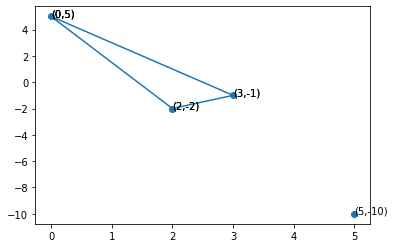

In [6]:
# convex hull creator
import numpy as np
import matplotlib.pyplot as plt
import math

# xlis = [1,8,3,4,3,8,10,6,8,4,5,10,10,8]
# ylis = [1,5,10,6,6,0,4,1,6,9,1,10,0,-1]
xlis = [0, 3, 2, 5]
ylis = [5, -1, -2, -10]

line = (xlis[0], ylis[0], xlis[1], ylis[1])
point = (xlis[2], ylis[2])
plt.scatter(xlis, ylis)
for i in range(len(xlis)):
    plt.text(xlis[i], ylis[i], f"({xlis[i]},{ylis[i]})")
# plt.show()

def point_dir(line, point, tol=1e-10):
    x1, y1, x2, y2 = line
    a, b = point
    
    l1, l2 = x2-x1, y2-y1
    m1, m2 = a-x1, b-y1
    ans = l1*m2 - l2*m1
    if abs(ans)<=tol:
        return 0
    else:
        return -1 if ans<0 else 1
    
def convex_hull(xlis, ylis):
    points = sorted(list(zip(xlis, ylis)))
    up, down = [], []
    x0, y0 = points[0]
    for i in points:
        if i[1] >= y0:
            up.append(i)
        else:
            down.append(i)
    down.reverse()
    up.append((up[-1][0]+1, -1))
    down.append((down[-1][0]+1, -1))
    
    s, e, f = 0, 0, 0
    for i in range(len(up)-1):
        if up[i][0] == up[i+1][0]:
            if f == 0:
                s = i
            e = i+1
            f = 1
        elif f:
            up[s:e+1] = sorted(up[s:e+1], key=lambda x: x[1], reverse=True)
            f = 0
            
    s, e, f = 0, 0, 0
    for i in range(len(down)-1):
        if down[i][0] == down[i+1][0]:
            if f == 0:
                s = i
            e = i+1
            f = 1
        elif f:
            down[s:e+1] = sorted(down[s:e+1], key=lambda x: x[1], reverse=True)
            f = 0
    up.pop()
    down.pop()
    points = up+down
    if len(points) > 3:
        i = 1
        hull = [points[0], points[1]]
        x, y = points[2]
        while x != x0 or y != y0:
            point, line = (x, y), (hull[-2][0], hull[-2][1], hull[-1][0], hull[-1][1])
            if point_dir(line, point) != 1:
                hull.append((x, y))
                i+=1
                x, y = points[(i+1)%len(points)]
            else:
                if len(hull)>=2:
                    hull.pop()
                if len(hull) <= 1:
                    hull.append((x,y))
                    i+=1
                    x, y = points[(i+1)%len(points)]
    hull.append((x0, y0))
    return hull

hull = convex_hull(xlis, ylis)
X, Y = zip(*hull)
plt.plot(X, Y)
for i in range(len(X)):
    plt.text(X[i], Y[i], f"({X[i]},{Y[i]})")
plt.show()